In [32]:
import gzip
from collections import defaultdict
import random
import scipy
from implicit import bpr
from collections import defaultdict
import math
import tensorflow as tf
from collections import defaultdict
import pandas as pd
import csv
import matplotlib.pyplot as plt
from collections import Counter


In [33]:
file_path = './archive/RAW_recipes.csv'

minutes = [] #index 2
# tags = [] #index5
nutrition = [] #index 6
nsteps = [] #index7
# steps = [] #index8
# description = [] #index9
# ingredients = [] #index10
ningredients = [] #index11

with open(file_path, 'r') as file:
    reader = csv.reader(file)
    count = 0
    for row in reader:
        count +=1
        if count == 1:
            continue
        minutes.append(int(row[2]))
        # tags.append(row[5])
        nutrition.append(row[6])
        nsteps.append(int(row[7]))
        # steps.append(row[8])
        # description.append(row[9])
        # ingredients.append(row[10])
        ningredients.append(row[11])

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 192, 193, 194, 195, 196, 197, 198, 200, 201, 202, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 217, 218, 219, 220, 221, 222, 223, 225, 228, 230, 232, 234, 235,

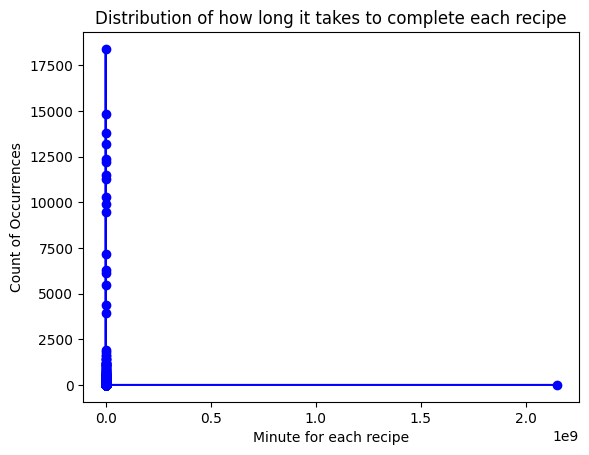

In [34]:
#visualizing distribution of minutes
dictMinutes = {}
for i in minutes:
    if i not in dictMinutes.keys():
        dictMinutes[i] = 1
    else:
        dictMinutes[i] += 1
        
#line graph
sorted_minutes = sorted(dictMinutes.keys())

# print(len(sorted_minutes))
print(sorted_minutes)

plt.plot(sorted_minutes, [dictMinutes[minute] for minute in sorted_minutes], marker='o',color = 'blue')
# Add labels and title
plt.xlabel('Minute for each recipe')
plt.ylabel('Count of Occurrences')
plt.title('Distribution of how long it takes to complete each recipe')
plt.show()      

defaultdict(<class 'int'>, {11: 14131, 9: 18265, 6: 19927, 5: 18047, 4: 14753, 10: 16272, 8: 19980, 12: 11940, 2: 6982, 7: 20785, 20: 2468, 14: 8297, 13: 10137, 3: 11461, 25: 926, 26: 791, 41: 74, 15: 6759, 16: 5522, 1: 2442, 21: 2005, 18: 3621, 17: 4640, 19: 3184, 38: 100, 24: 1128, 39: 85, 27: 654, 33: 233, 30: 364, 44: 45, 22: 1683, 36: 139, 28: 545, 34: 182, 35: 149, 23: 1334, 29: 428, 46: 28, 45: 42, 37: 107, 108: 1, 52: 9, 70: 4, 73: 2, 43: 40, 40: 80, 51: 14, 31: 298, 42: 50, 32: 244, 53: 15, 0: 1, 47: 30, 64: 4, 55: 19, 62: 6, 48: 27, 61: 5, 76: 3, 49: 30, 80: 1, 58: 6, 50: 15, 77: 1, 93: 1, 67: 2, 56: 9, 82: 3, 66: 3, 90: 1, 60: 5, 54: 9, 57: 9, 68: 1, 113: 1, 110: 1, 88: 2, 100: 1, 65: 3, 59: 5, 145: 1, 63: 6, 81: 3, 86: 1, 75: 1, 69: 2, 85: 1, 79: 1, 87: 1, 71: 1, 72: 1, 97: 1, 98: 1})
[(0, 1), (1, 2442), (2, 6982), (3, 11461), (4, 14753), (5, 18047), (6, 19927), (7, 20785), (8, 19980), (9, 18265), (10, 16272), (11, 14131), (12, 11940), (13, 10137), (14, 8297), (15, 6759), (

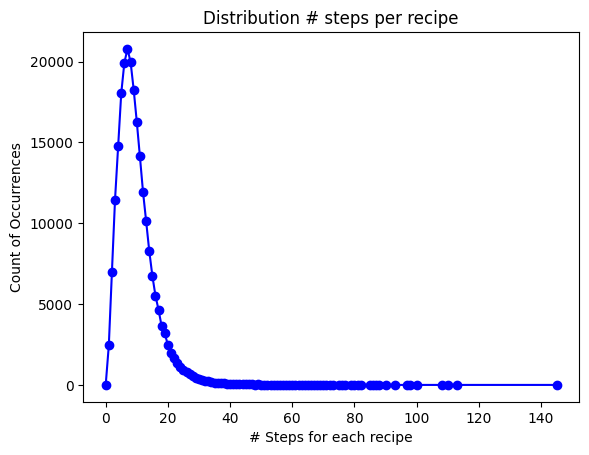

In [38]:
#visualizing distribution of nsteps
dictNsteps = defaultdict(int)
for i in nsteps:
        dictNsteps[i] += 1
        
sorted_dictNsteps = sorted(dictNsteps.items())

plt.plot([x[0] for x in sorted_dictNsteps], [x[1] for x in sorted_dictNsteps], marker='o',color = 'blue')

# Add labels and title
plt.xlabel('# Steps for each recipe')
plt.ylabel('Count of Occurrences')
plt.title('Distribution # steps per recipe')
# custom_intervals = [1, 10, 20, 30, 40, 50, 60, 70, 80]  # Modify this list according to your needs
# plt.xticks(custom_intervals)
plt.show()      

        